<a href="https://colab.research.google.com/github/Ajayuppu/LGMVIP--DataScience/blob/main/Iris_Flowers_Classification_Based_On_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am **Ajay Uppu** .This is my First Task in DataScience Internship at Let's Grow More(LGM) **VIP batch September-2022**.

My First task is to predict Iris Flowers Classification ML Project.
Iris Flowers Classification ML Project


**STEP 1 :IMPORT**

In [41]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets,model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [42]:
plt.rcParams['figure.figsize']=(15,9)

STEP 2 : DATASET

In [43]:
data=datasets.load_iris()

In [44]:
X=data['data']
y=data['target']
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size=0.8,random_state=15)


PLOTTING OF TRAINING DATA

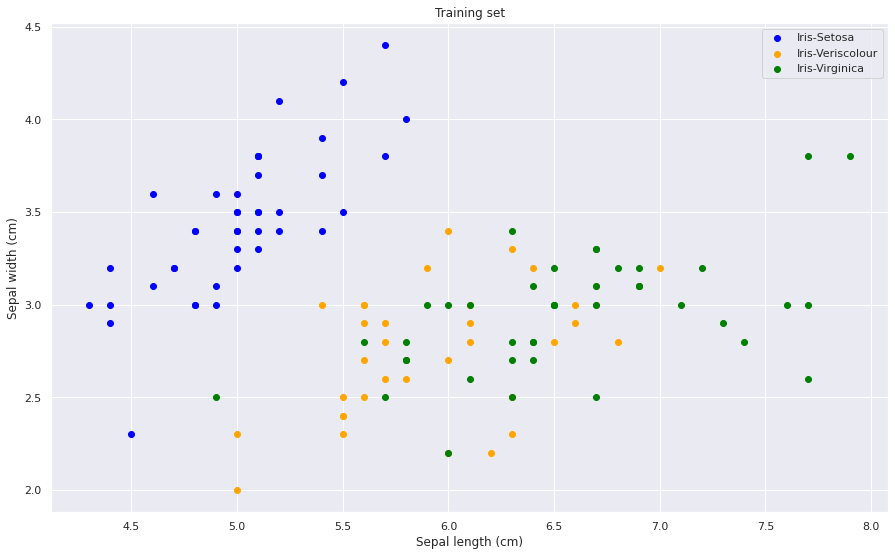

In [46]:
labels={0: "Iris-Setosa",1:'Iris-Veriscolour',2: 'Iris-Virginica'}
label_colours = ['blue','orange','green']

def plot_data(x,y,labels,colours,a=0,b=1,title='Training set'):
  for c in np.unique(y):
    inx = np.where(y == c)
    plt.scatter(x[inx, a], x[inx, b], label=labels[c],c=colours[c])
  plt.title(title)
  plt.xlabel("Sepal length (cm)")
  plt.ylabel("Sepal width (cm)")
  plt.legend()

plt.figure(figsize=(15,9))
plot_data(X_train, y_train, labels, label_colours)
plt.show()

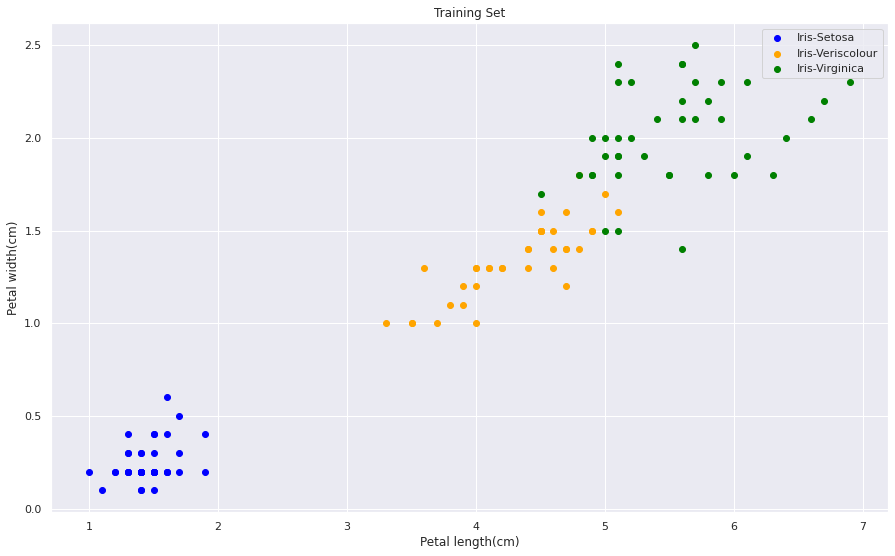

In [47]:
#plot the training data

labels = {0: 'Iris-Setosa',1:'Iris-Veriscolour',2:'Iris-Virginica'}
label_colours =['blue','orange','green']

plt.figure(figsize=(15,9))
#plot the data(X_train,y_train,labels,label_colours,a=2,b=3)
for c in np.unique(y_train):
  inx = np.where(y_train == c)
  plt.scatter(X_train[inx, 2],X_train[inx, 3],label=labels[c],c=label_colours[c])
plt.title("Training Set")
plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width(cm)")
plt.legend()
plt.show()


TRAINING OF FULL DATASET

In [48]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
tf.keras.backend.clear_session()
mlp = Sequential([ 
                  Dense(3,input_shape=(4,),activation='softmax')])
mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [50]:
history =mlp.fit(X_train, y_train, validation_split=0.1,batch_size=16, epochs=1000, verbose=0)

In [51]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.663622,0.111111,1.985338,0.000000
1,1.636865,0.111111,1.954111,0.000000
2,1.611472,0.120370,1.923162,0.083333
3,1.584935,0.129630,1.893973,0.083333
4,1.559877,0.138889,1.864553,0.083333


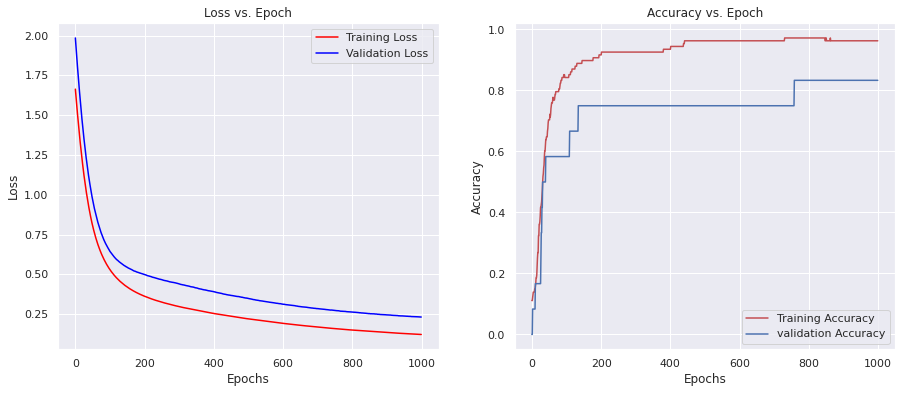

In [52]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()


In [53]:
mlp.evaluate(X_train,y_train)


4/4 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9500


[0.13256065547466278, 0.949999988079071]

In [54]:
print(f'Test Accuracy : {mlp.evaluate(X_test,y_test)[1]: .2%}')

1/1 [==============================] - 0s 21ms/step - loss: 0.1078 - accuracy: 1.0000
Test Accuracy :  100.00%


DATASET (SEPAL)

In [55]:
X_train, X_test,y_train,y_test=model_selection.train_test_split(X[:, :2],y,train_size=0.8,random_state=15)

#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
X_train.shape

(120, 2)

ARTIFICIAL NEURAL NETWORK(ANN)

In [57]:
tf.keras.backend.clear_session()
classifier = Sequential([
                         Dense(5,input_shape=(2,),activation='relu'),
                         Dense(3,activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = classifier.fit(X_train,y_train,validation_split=0.1,batch_size=16,epochs=1000,verbose=0)

In [59]:
df=pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.366012,0.805556,0.293429,0.916667
996,0.366023,0.805556,0.293237,0.916667
997,0.365965,0.805556,0.293554,0.916667
998,0.366028,0.805556,0.292508,0.916667
999,0.365920,0.805556,0.293047,0.916667


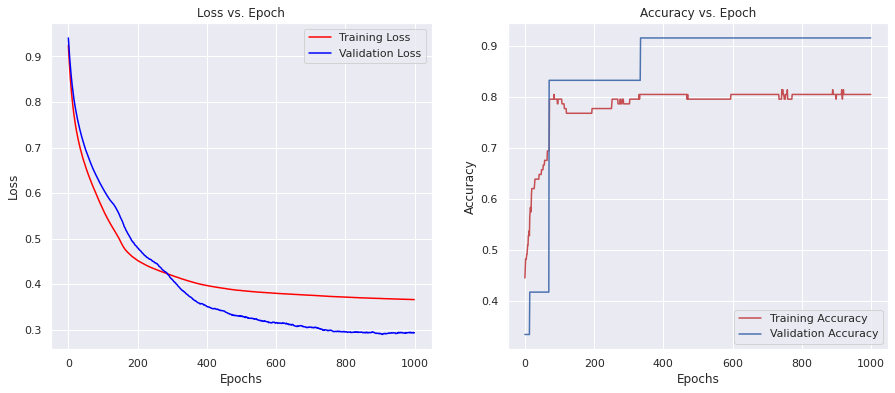

In [60]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [61]:
classifier.evaluate(X_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.8167


[0.35852473974227905, 0.8166666626930237]

In [62]:
print(f'Test Accuracy: {classifier.evaluate(X_test,y_test)[1]: .2%}')


1/1 [==============================] - 0s 21ms/step - loss: 0.4130 - accuracy: 0.7667
Test Accuracy:  76.67%


EVALUATE USING CONFUSION MATRIX


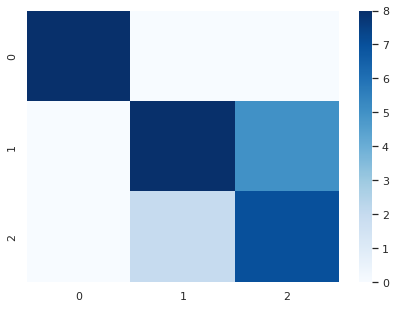

In [63]:
y_pred = np.argmax(classifier.predict(X_test),axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap="Blues")


In [64]:
def get_meshgrid(x0_range, x1_range,num_points=100):
  x0 = np.linspace(x0_range[0],x0_range[1],num_points)
  x1 = np.linspace(x1_range[0],x1_range[1],num_points)

  return np.meshgrid(x0,x1)

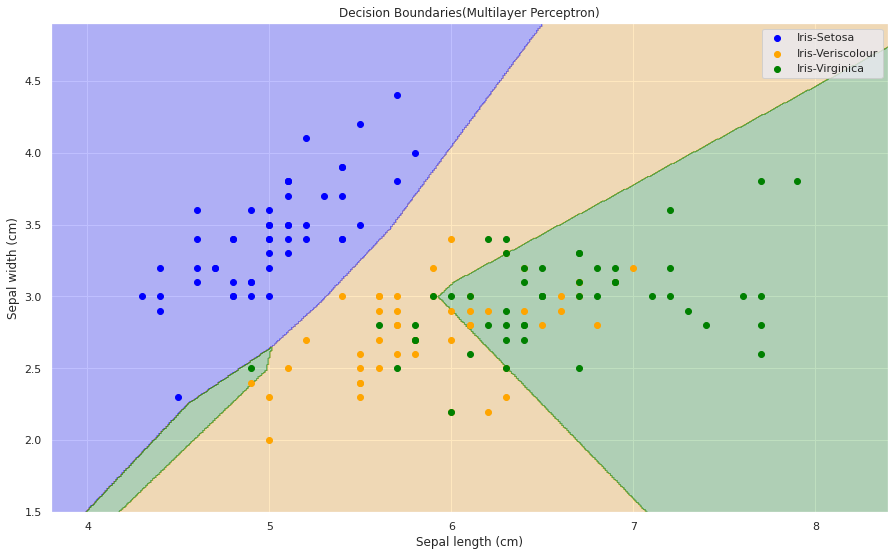

In [65]:
#Visualization

num_points = 500
x_mesh,y_mesh=get_meshgrid([X[:, 0].min() - 0.5,X[:, 0].max() + 0.5],
                                        [X[:,1].min() - 0.5,X[:,1].max() + 0.5],num_points=num_points)

y_pred =np.argmax(classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)),axis=1).reshape(num_points,num_points)

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)


plot_data(X,y,labels,label_colours,title='Decision Boundaries(Multilayer Perceptron)')
plt.show()

LOGISTIC REGRESSION

In [66]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [67]:
#result test

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

Test Accuracy: 90.00%


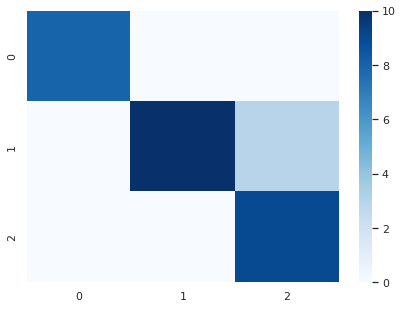

In [68]:
#evaluate using confusion matrix

cm=confusion_matrix(y_test,y_pred)
diagonal=np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy:.2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

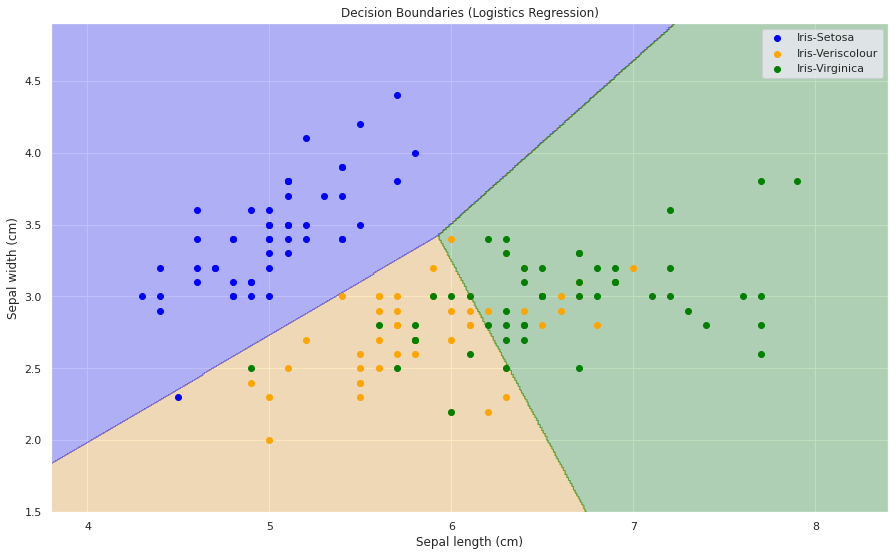

In [69]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[ :, 0].min()- 0.5,X[:,0].max() + 0.5],
                             [X[:, 1].min()-0.5,X[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries (Logistics Regression)')
plt.show()


NAIVE BAYES

In [70]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred = classifier.predict(X_test)

Test Accuracy :  90.00%


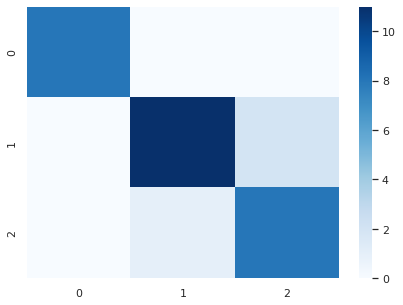

In [72]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy=diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

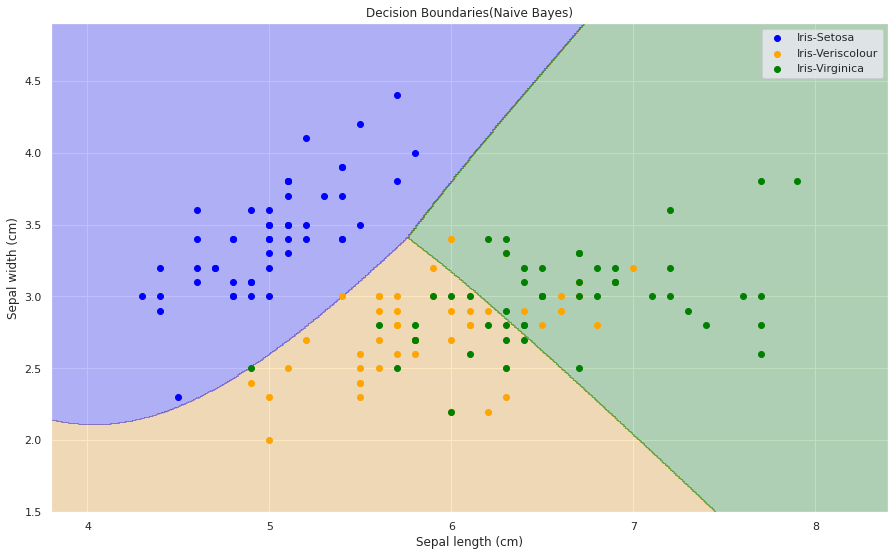

In [73]:
#visualise

num_points =500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() -0.5,X[:,0].max() +0.5],
                             [X[:,1].min() -0.5,X[:,1].max() +0.5],num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Naive Bayes)')
plt.show()

SUPPORT VECTOR MACHINE(SVM)

In [74]:
#linear ,'poly','rbf','sigmoid','percomputed'

In [75]:
from sklearn.svm import SVC
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [76]:
y_pred = classifier.predict(X_test)

Test Accuracy :  86.67%


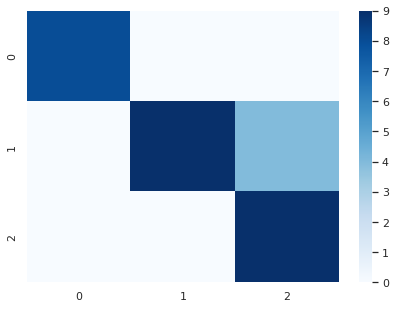

In [77]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy : {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')


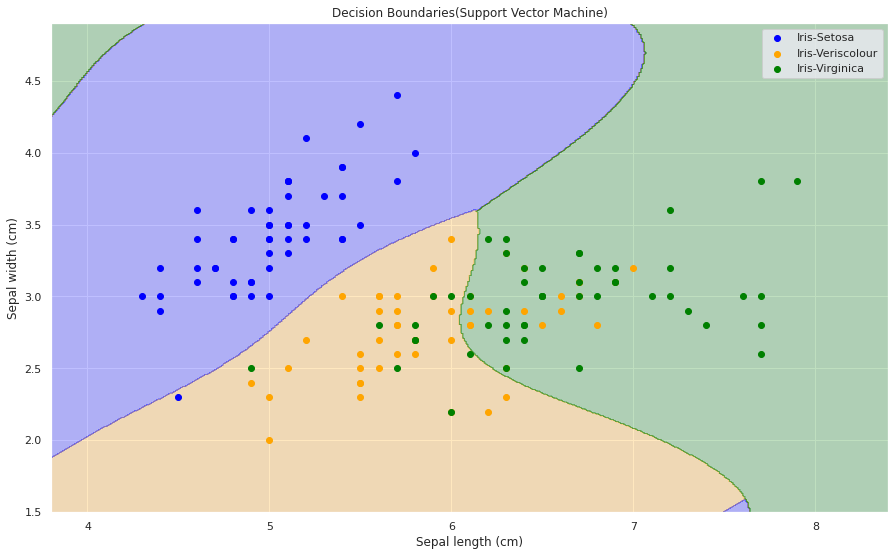

In [78]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Support Vector Machine)')
plt.show()

K-NEAREST NEIGHBORS

In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred = classifier.predict(X_test)

Test Accuracy:  73.33%


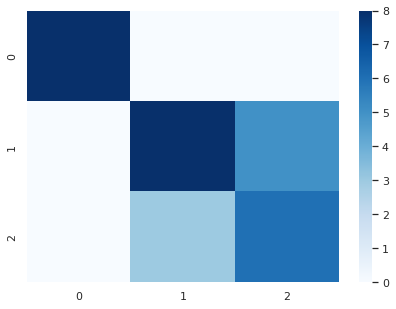

In [82]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')


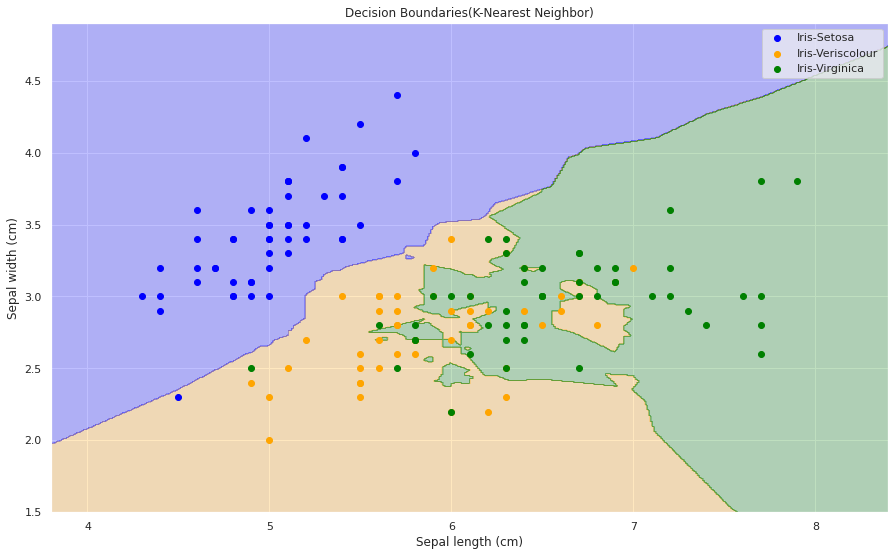

In [83]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(K-Nearest Neighbor)')
plt.show()

RANDOM FOREST


In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [85]:
y_pred = classifier.predict(X_test)

Test Accuracy:  76.67%


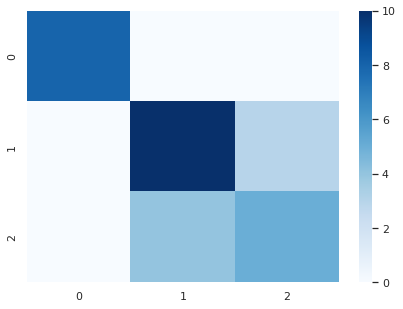

In [86]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

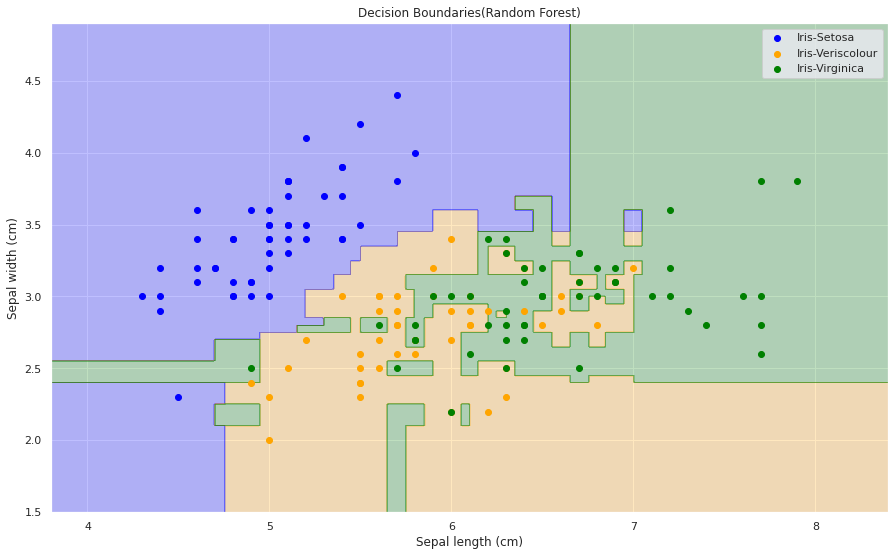

In [87]:
#visualise

num_points = 500
x_mesh,y_mesh = get_meshgrid([X[:,0].min() - 0.5,X[:,0].max() + 0.5],
                             [X[:,1].min() - 0.5, X[:,1].max() +0.5],num_points=num_points)
y_pred=classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))
plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(X,y,labels,label_colours,title='Decision Boundaries(Random Forest)')
plt.show()